In [ ]:
import pyspark as spark
from pyspark.sql import SparkSession
import dask
print(dask.__version__)
import pandas as pd


2025.9.1


In [6]:
import pandas as pd

# Load data
df = pd.read_csv("yellow_tripdata_2024-01_sample.csv",
                 parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])

print("Shape:", df.shape)
print(df.head())


Shape: (20000, 13)
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2024-01-03 18:24:00   2024-01-03 19:19:00                3   
1         2  2024-01-24 23:49:00   2024-01-25 00:17:00                1   
2         2  2024-01-21 07:00:00   2024-01-21 07:04:00                1   
3         1  2024-01-14 14:31:00   2024-01-14 14:33:00                1   
4         1  2024-01-14 10:09:00   2024-01-14 10:12:00                1   

   trip_distance  PULocationID  DOLocationID store_and_fwd_flag payment_type  \
0          5.231            94           247                  N          DIS   
1          3.758           223           203                  N          CSH   
2          2.219           200            97                  N          CSH   
3          6.808           150            90                  N          CRD   
4          2.641           237           146                  N          CRD   

   fare_amount  tip_amount  extra  total_amount  

In [7]:
print(df.info())
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               20000 non-null  int64         
 1   tpep_pickup_datetime   20000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  20000 non-null  datetime64[ns]
 3   passenger_count        20000 non-null  int64         
 4   trip_distance          20000 non-null  float64       
 5   PULocationID           20000 non-null  int64         
 6   DOLocationID           20000 non-null  int64         
 7   store_and_fwd_flag     20000 non-null  object        
 8   payment_type           20000 non-null  object        
 9   fare_amount            20000 non-null  float64       
 10  tip_amount             20000 non-null  float64       
 11  extra                  20000 non-null  float64       
 12  total_amount           20000 non-null  float64       
dtypes

In [8]:
print("Avg Trip Distance:", df['trip_distance'].mean())
print("Avg Fare:", df['fare_amount'].mean())
df['tip_percent'] = (df['tip_amount'] / df['fare_amount']) * 100
print("Avg Tip %:", df['tip_percent'].mean())


Avg Trip Distance: 2.7159053500000003
Avg Fare: 9.36851
Avg Tip %: 10.364650358198299


In [9]:
# 1. Busiest pickup locations
print(df['PULocationID'].value_counts().head(10))

# 2. Peak hours
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
print(df['pickup_hour'].value_counts().head())

# 3. Passenger count distribution
print(df['passenger_count'].value_counts())

# 4. Payment types
print(df['payment_type'].value_counts())

# 5. Revenue per day
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
print(df.groupby('pickup_date')['total_amount'].sum().head())


PULocationID
254    97
29     97
197    96
45     95
161    94
122    94
31     93
237    93
53     93
223    93
Name: count, dtype: int64
pickup_hour
9     889
3     888
19    879
6     870
23    868
Name: count, dtype: int64
passenger_count
1    11981
2     4030
3     1582
4     1199
6      609
5      599
Name: count, dtype: int64
payment_type
CRD         13830
CSH          5168
DIS           403
NoCharge      401
UNK           198
Name: count, dtype: int64
pickup_date
2024-01-01    7080.87
2024-01-02    6892.35
2024-01-03    6812.93
2024-01-04    6774.58
2024-01-05    7004.26
Name: total_amount, dtype: float64


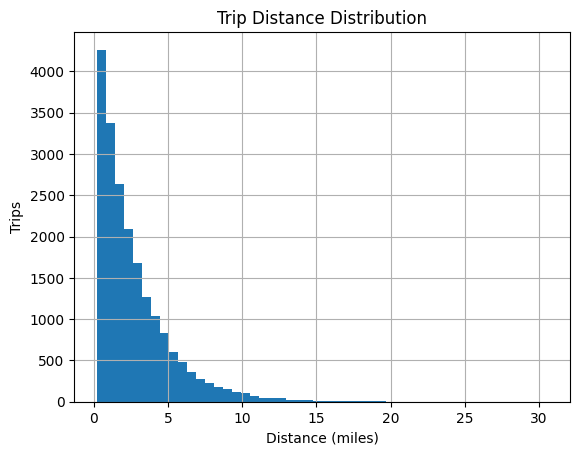

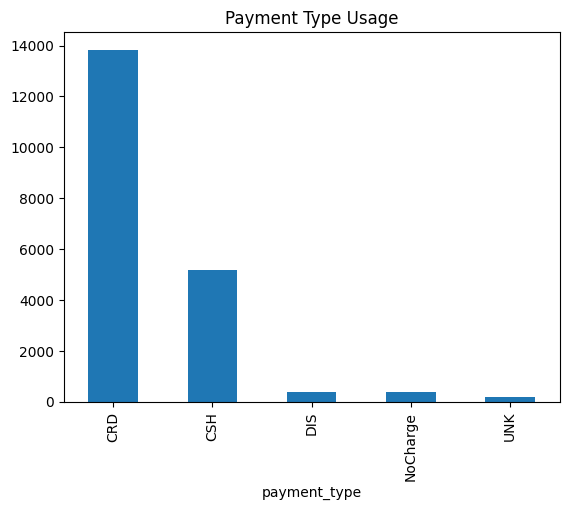

In [10]:
import matplotlib.pyplot as plt

# Trip distance histogram
df['trip_distance'].hist(bins=50)
plt.xlabel("Distance (miles)")
plt.ylabel("Trips")
plt.title("Trip Distance Distribution")
plt.show()

# Payment type counts
df['payment_type'].value_counts().plot(kind='bar')
plt.title("Payment Type Usage")
plt.show()


✅ Data Loaded
Shape: (20000, 13)
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2024-01-03 18:24:00   2024-01-03 19:19:00                3   
1         2  2024-01-24 23:49:00   2024-01-25 00:17:00                1   
2         2  2024-01-21 07:00:00   2024-01-21 07:04:00                1   
3         1  2024-01-14 14:31:00   2024-01-14 14:33:00                1   
4         1  2024-01-14 10:09:00   2024-01-14 10:12:00                1   

   trip_distance  PULocationID  DOLocationID store_and_fwd_flag payment_type  \
0          5.231            94           247                  N          DIS   
1          3.758           223           203                  N          CSH   
2          2.219           200            97                  N          CSH   
3          6.808           150            90                  N          CRD   
4          2.641           237           146                  N          CRD   

   fare_amount  tip_amount  extra  

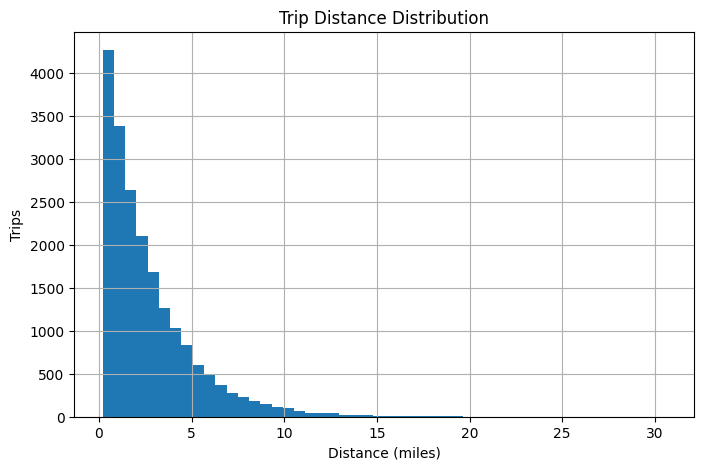

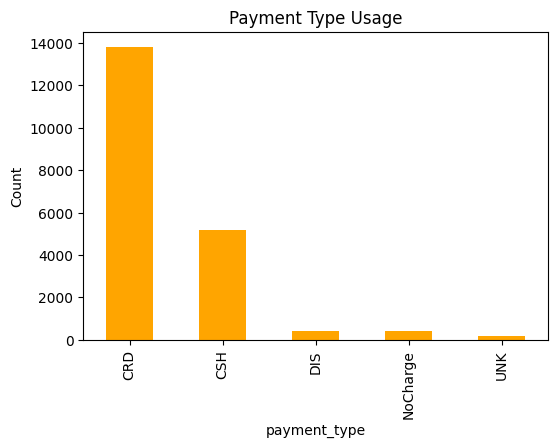

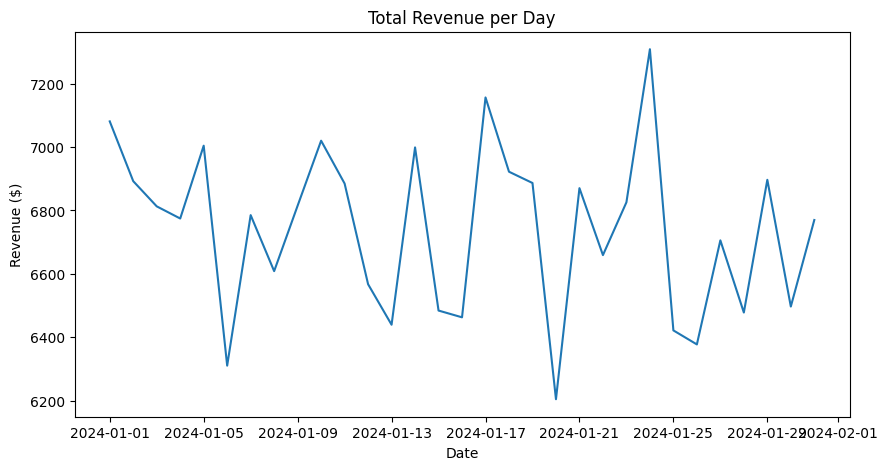


✅ Analysis Complete — Report Ready


In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv("yellow_tripdata_2024-01_sample.csv",
                 parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])

print("✅ Data Loaded")
print("Shape:", df.shape)
print(df.head())

# Step 3: Basic Info
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isna().sum())

# Step 4: Basic Statistics
print("\n--- Basic Statistics ---")
print("Avg Trip Distance:", df['trip_distance'].mean())
print("Avg Fare Amount:", df['fare_amount'].mean())
df['tip_percent'] = (df['tip_amount'] / df['fare_amount']) * 100
print("Avg Tip %:", df['tip_percent'].mean())

# Step 5: Insights

# 1. Top 10 busiest pickup locations
print("\n--- Top 10 Pickup Locations ---")
print(df['PULocationID'].value_counts().head(10))

# 2. Peak hours
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
print("\n--- Peak Hours ---")
print(df['pickup_hour'].value_counts().head())

# 3. Passenger count distribution
print("\n--- Passenger Count Distribution ---")
print(df['passenger_count'].value_counts())

# 4. Payment types
print("\n--- Payment Type Usage ---")
print(df['payment_type'].value_counts())

# 5. Revenue per day
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
print("\n--- Daily Revenue (first 10 days) ---")
print(df.groupby('pickup_date')['total_amount'].sum().head(10))

# Step 6: Visualizations

# Trip distance histogram
plt.figure(figsize=(8,5))
df['trip_distance'].hist(bins=50)
plt.xlabel("Distance (miles)")
plt.ylabel("Trips")
plt.title("Trip Distance Distribution")
plt.show()

# Payment type bar chart
plt.figure(figsize=(6,4))
df['payment_type'].value_counts().plot(kind='bar', color='orange')
plt.title("Payment Type Usage")
plt.ylabel("Count")
plt.show()

# Revenue per day line chart
daily_revenue = df.groupby('pickup_date')['total_amount'].sum()
plt.figure(figsize=(10,5))
daily_revenue.plot(kind='line')
plt.title("Total Revenue per Day")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.show()

print("\n✅ Analysis Complete — Report Ready")
